This code runs several models on the 49-protein dataset. It combines all the cancers into a single group, and compares Cancer vs. Control. It incorporates 5-fold k-fold cross-validation and bootstrapping.

In [25]:
import pandas as pd

In [26]:
# Import the data

df_full = pd.read_csv("DataCleaning_and_ExploratoryAnalysis/Combined_df2.csv")


In [27]:
df_full

,Unnamed: 0.1,Unnamed: 0,Sample_ID,Cancer,Q15389,P29965,P49763,Q02763,P01127,P09341,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,0,0.0,PM910,Ctrl,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,1,1.0,PM396,Ctrl,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,2,2.0,PM190,Ctrl,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,3,3.0,PM270,Ctrl,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,4,4.0,PM656,Ctrl,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,162,NaN,C29ZZ80Y4.01,HODG,9.87819,7.15139,7.71189,7.72042,10.23705,7.66455,...,7.19963,4.26576,7.80544,9.24521,5.59883,5.16395,9.03873,4.24414,1.53814,5.30002
1901,163,NaN,C29ZS2ML8.01,HODG,9.42403,6.16559,7.48199,7.30005,10.14143,7.84437,...,6.90334,4.14795,7.74788,8.80026,5.18470,7.53391,7.97077,3.84446,3.41778,3.84928
1902,164,NaN,C29ZFFZ0Q.01,HODG,10.26858,8.11759,7.78457,7.46200,10.25920,8.15014,...,6.69773,3.60838,7.67268,7.83666,5.35574,5.27098,7.55698,3.11025,1.56641,4.23022
1903,165,NaN,C29ZQOG4N.01,HODG,10.15491,7.09910,7.78078,7.45732,10.27589,8.17975,...,7.01314,5.67411,8.44027,8.79263,5.66616,7.99492,8.71554,5.02993,3.94930,4.90380


In [28]:
# Combine all the cancers into one category
df_bloodcombined = df_full.copy(deep = True)
df_bloodcombined=df_bloodcombined.replace(to_replace = ['AML', 'CLL', 'LYMPH', 'MYEL', 'BRC', 'CRC', 'CVX', 'ENDC', 'ESO', 'GLIOM','HODG','LUNGC','OVC','PRC'], value = 'CANCER' )

In [29]:
# Verify that the groups were combined as expected
set(df_bloodcombined['Cancer'])

{'CANCER', 'Ctrl'}

In [30]:
df_bloodcombined

,Unnamed: 0.1,Unnamed: 0,Sample_ID,Cancer,Q15389,P29965,P49763,Q02763,P01127,P09341,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,0,0.0,PM910,Ctrl,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,1,1.0,PM396,Ctrl,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,2,2.0,PM190,Ctrl,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,3,3.0,PM270,Ctrl,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,4,4.0,PM656,Ctrl,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,162,NaN,C29ZZ80Y4.01,CANCER,9.87819,7.15139,7.71189,7.72042,10.23705,7.66455,...,7.19963,4.26576,7.80544,9.24521,5.59883,5.16395,9.03873,4.24414,1.53814,5.30002
1901,163,NaN,C29ZS2ML8.01,CANCER,9.42403,6.16559,7.48199,7.30005,10.14143,7.84437,...,6.90334,4.14795,7.74788,8.80026,5.18470,7.53391,7.97077,3.84446,3.41778,3.84928
1902,164,NaN,C29ZFFZ0Q.01,CANCER,10.26858,8.11759,7.78457,7.46200,10.25920,8.15014,...,6.69773,3.60838,7.67268,7.83666,5.35574,5.27098,7.55698,3.11025,1.56641,4.23022
1903,165,NaN,C29ZQOG4N.01,CANCER,10.15491,7.09910,7.78078,7.45732,10.27589,8.17975,...,7.01314,5.67411,8.44027,8.79263,5.66616,7.99492,8.71554,5.02993,3.94930,4.90380


In [31]:
len(df_bloodcombined['Cancer'] == 'Ctrl')

1905

In [32]:
# Specify the protein list 
proteins=df_bloodcombined.columns[4:]
# Check that we have the right number of proteins
len(proteins)

49

In [33]:
df_bloodcombined.head()

,Unnamed: 0.1,Unnamed: 0,Sample_ID,Cancer,Q15389,P29965,P49763,Q02763,P01127,P09341,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,0,0.0,PM910,Ctrl,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,1,1.0,PM396,Ctrl,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,2,2.0,PM190,Ctrl,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,3,3.0,PM270,Ctrl,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,4,4.0,PM656,Ctrl,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381


In [34]:
# Encode the cancer types as numbers

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_bloodcombined['Cancer'] = le.fit_transform(df_bloodcombined['Cancer'])

In [35]:
df_bloodcombined.head(15)

,Unnamed: 0.1,Unnamed: 0,Sample_ID,Cancer,Q15389,P29965,P49763,Q02763,P01127,P09341,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,0,0.0,PM910,1,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,1,1.0,PM396,1,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,2,2.0,PM190,1,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,3,3.0,PM270,1,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,4,4.0,PM656,1,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381
5,5,5.0,PM736,1,8.64457,5.79507,8.27732,8.37578,8.60373,9.03092,...,8.76805,5.53215,10.41412,8.70804,5.83762,7.71496,7.50007,5.59281,5.25662,3.88111
6,6,6.0,PM842,1,10.06218,5.06380,7.74244,8.41381,9.86604,10.05079,...,8.56072,4.13384,10.50253,8.85963,4.95377,7.49059,7.39059,4.01350,5.06355,3.70582
7,7,7.0,PM767,1,9.86577,7.30840,8.29889,8.60954,11.17774,10.68756,...,8.95749,4.62731,11.00948,9.47875,5.84993,7.84098,8.23261,4.39093,5.66446,3.84306
8,8,8.0,PM1497,1,8.37279,5.91951,8.51155,8.31815,8.95261,9.10530,...,8.58994,4.68348,10.49201,8.60244,5.16184,7.31519,7.61259,4.02262,4.44670,3.31080
9,9,9.0,PM746,1,10.34566,5.71417,8.05251,8.38463,10.61735,10.44890,...,8.64534,4.59777,10.50475,8.67217,5.30830,7.66071,7.24119,4.71803,4.29578,3.78925


In [36]:
# Split the data into X and y
X = df_bloodcombined[proteins]
y = df_bloodcombined['Cancer']

In [37]:
y.size

1905

In [38]:
X.head()

,Q15389,P29965,P49763,Q02763,P01127,P09341,O00182,Q14116,P09601,Q92583,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,8.65712,7.81074,11.03461,8.07038,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,8.46706,8.18828,11.91449,8.15394,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,9.09830,9.15899,11.66469,8.58580,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,8.72250,8.57028,11.16933,7.91727,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,8.80904,8.18094,11.81232,7.69365,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381


In [39]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, stratify = y, test_size=0.2, random_state=100)

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.multiclass import OneVsRestClassifier
from scipy.stats import sem
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(penalty='l1', solver='liblinear', max_iter=500),
    "k-Nearest Neighbors (n=5)": KNeighborsClassifier(n_neighbors=5), 
    "k-Nearest Neighbors (n=13)": KNeighborsClassifier(n_neighbors=13),
}

In [42]:
# Cross-validation parameters
n_splits = 5  # Number of folds
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=100)

In [43]:
# Initialize KNNImputer for handling missing values
imputer = KNNImputer(n_neighbors=5, weights="uniform")

In [44]:
print(y_train.shape, y_test.shape)

(1524,) (381,)



Evaluating Logistic Regression with k-fold CV and kNN imputation...


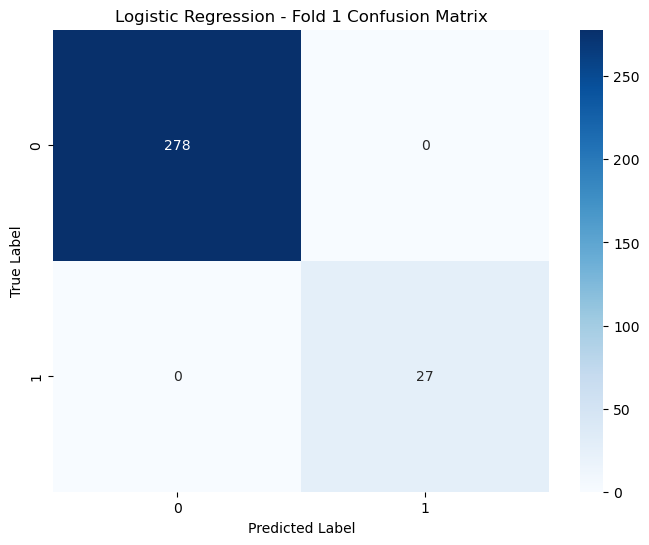


Fold 1 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000


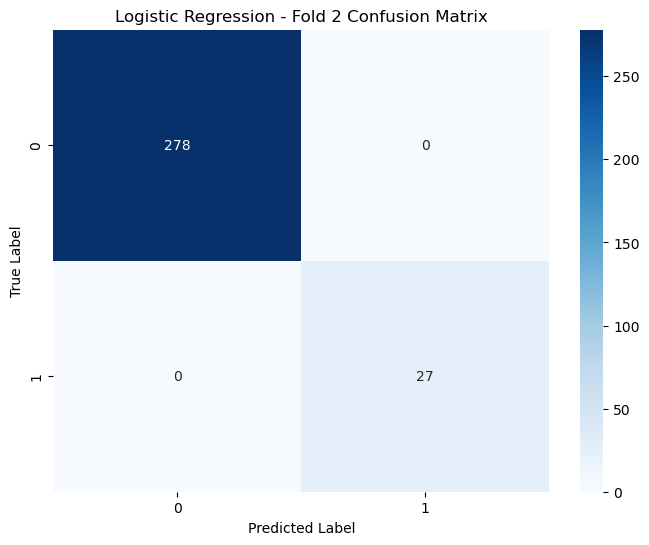


Fold 2 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000


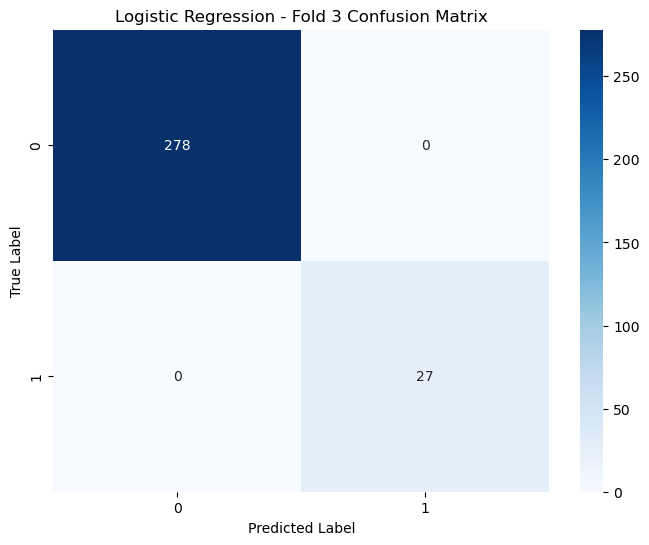


Fold 3 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000


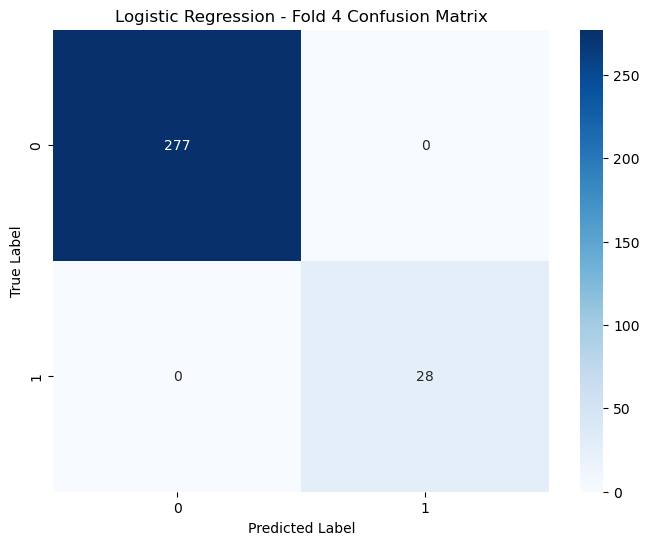


Fold 4 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000


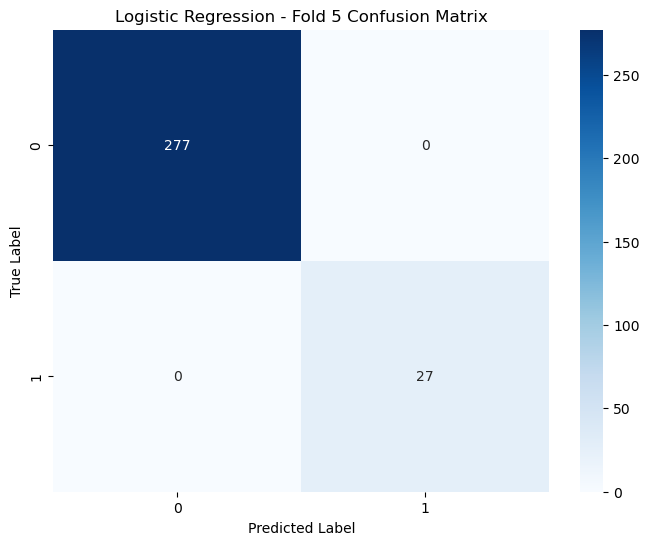


Fold 5 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000

Logistic Regression - Mean Accuracy: 1.0000 ± 0.0000
Logistic Regression - Mean F1 Score: 1.0000 ± 0.0000
Logistic Regression - Mean G-Mean: 1.0000 ± 0.0000

Evaluating k-Nearest Neighbors (n=5) with k-fold CV and kNN imputation...


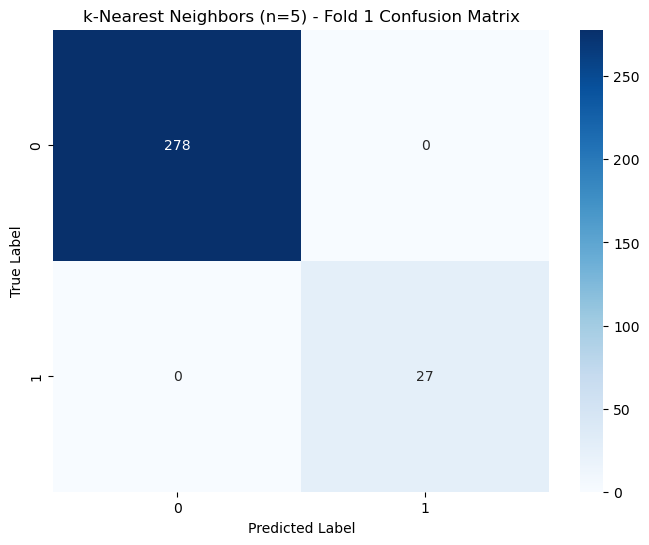


Fold 1 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000


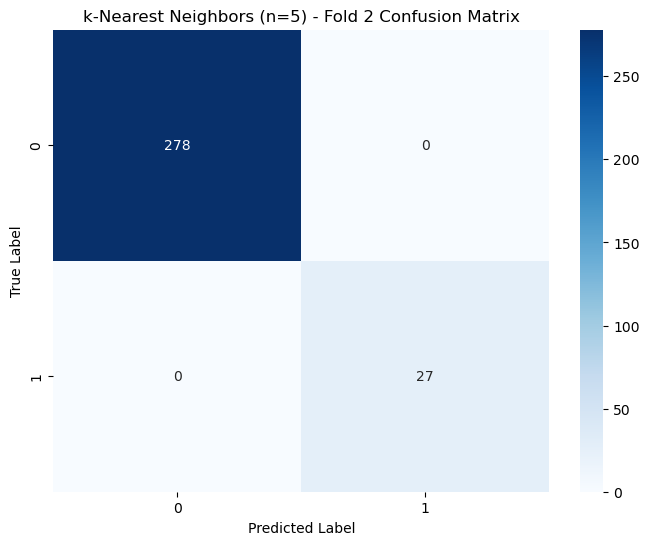


Fold 2 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000


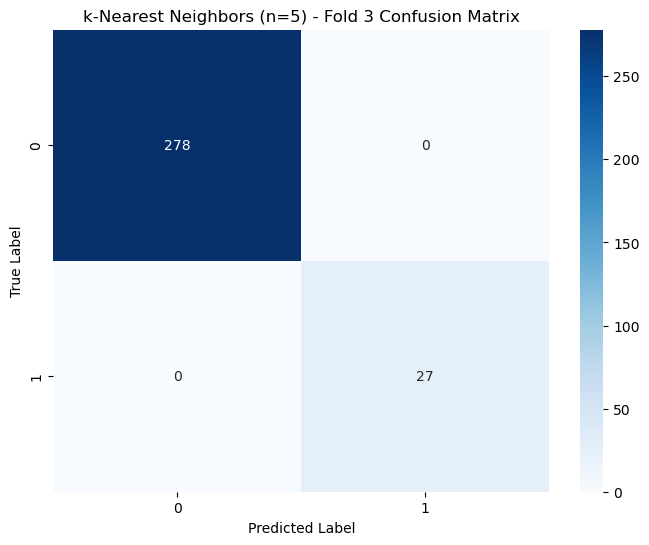


Fold 3 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000


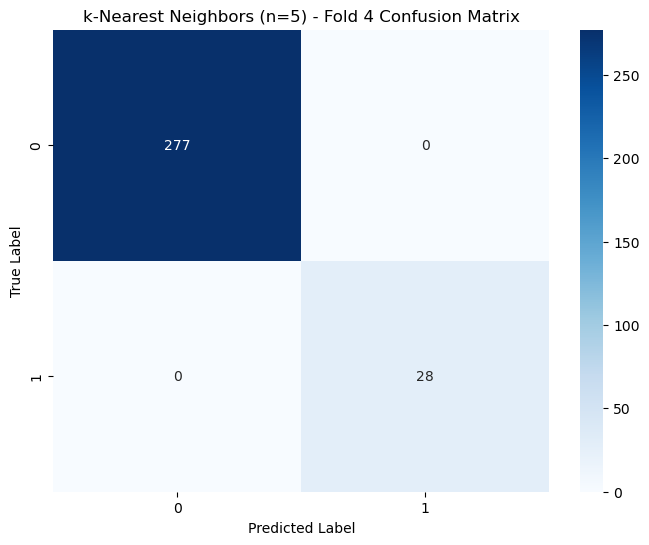


Fold 4 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000


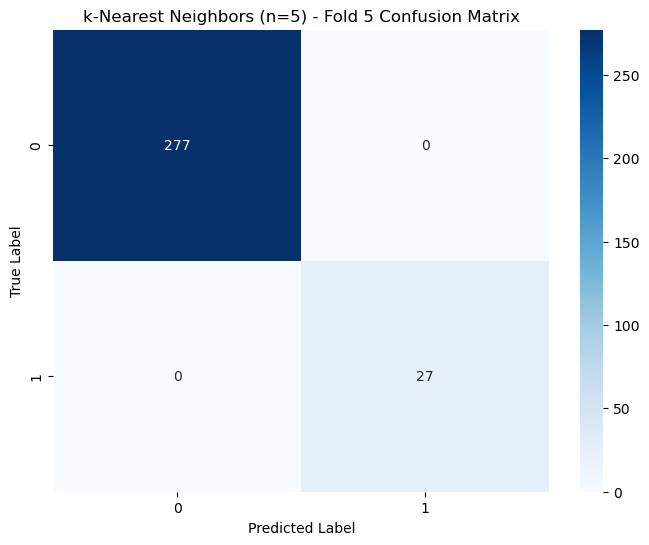


Fold 5 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000

k-Nearest Neighbors (n=5) - Mean Accuracy: 1.0000 ± 0.0000
k-Nearest Neighbors (n=5) - Mean F1 Score: 1.0000 ± 0.0000
k-Nearest Neighbors (n=5) - Mean G-Mean: 1.0000 ± 0.0000

Evaluating k-Nearest Neighbors (n=13) with k-fold CV and kNN imputation...


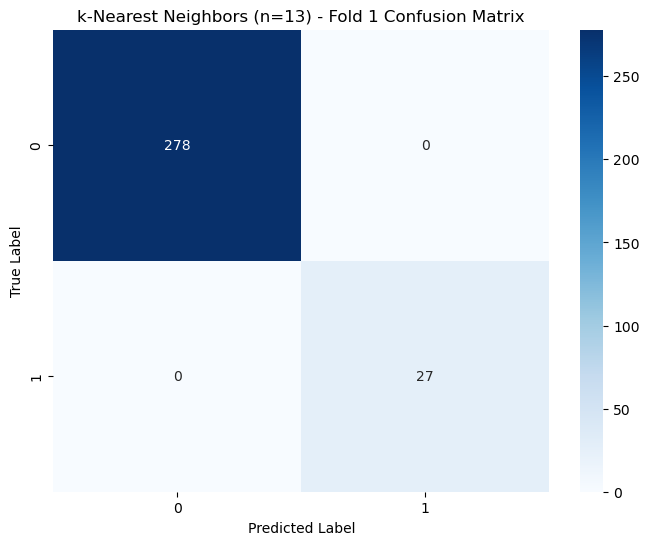


Fold 1 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000


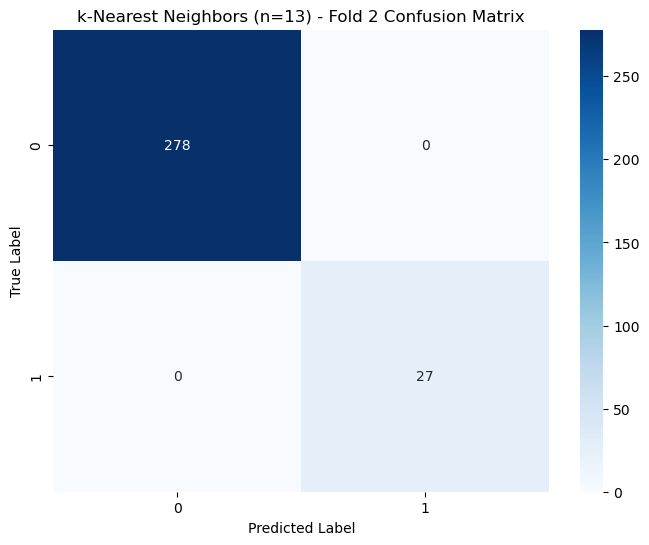


Fold 2 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000


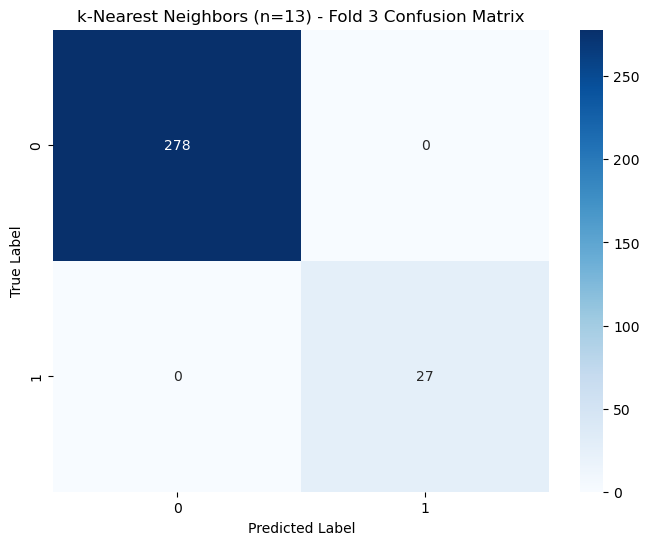


Fold 3 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000


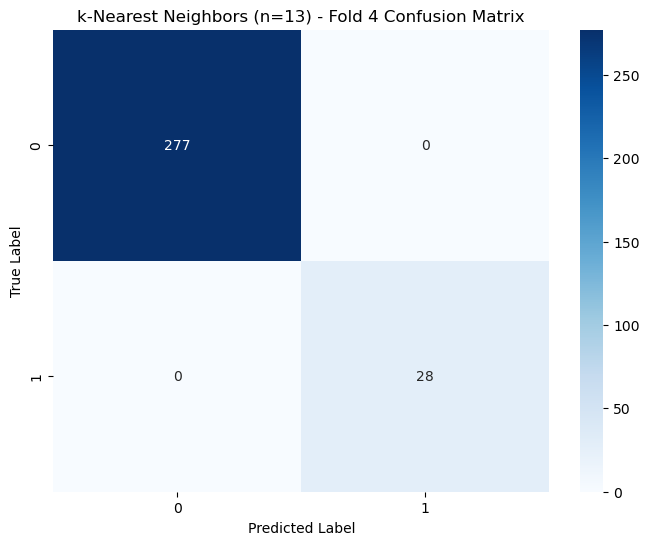


Fold 4 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000


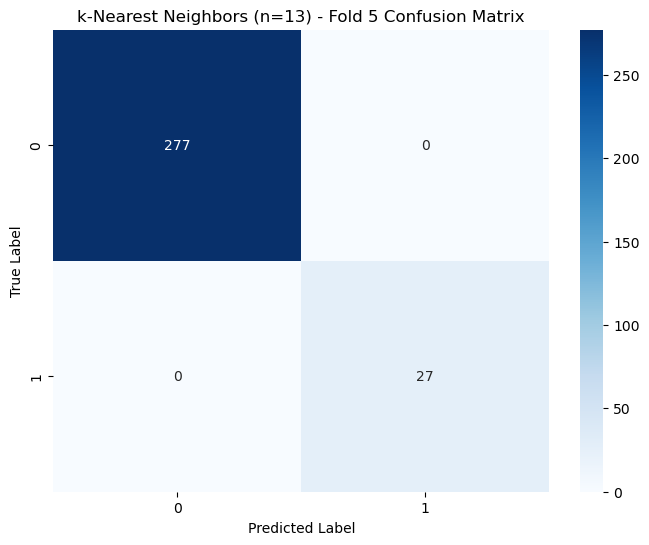


Fold 5 - Accuracy: 1.0000, F1 Score: 1.0000, G-Mean: 1.0000

k-Nearest Neighbors (n=13) - Mean Accuracy: 1.0000 ± 0.0000
k-Nearest Neighbors (n=13) - Mean F1 Score: 1.0000 ± 0.0000
k-Nearest Neighbors (n=13) - Mean G-Mean: 1.0000 ± 0.0000


In [45]:
# Loop over models
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} with k-fold CV and kNN imputation...")

    # Containers for metrics across folds
    fold_accuracies = []
    fold_f1_scores = []
    fold_gmeans = []
    fold_confusion_matrices = []

    # k-Fold Cross-Validation Loop
    for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
        # Extract train and test sets for the current fold
        X_fold_train = X_train.iloc[train_index]  # Use .iloc for DataFrames
        X_fold_test = X_train.iloc[test_index]
        y_fold_train = y_train.iloc[train_index]
        y_fold_test = y_train.iloc[test_index]

        # Apply KNN Imputer to impute missing values
        X_fold_train_imputed = imputer.fit_transform(X_fold_train)
        X_fold_test_imputed = imputer.transform(X_fold_test)

        # Train the model
        clf = model.fit(X_fold_train_imputed, y_fold_train)

        # Predict labels
        y_pred = clf.predict(X_fold_test_imputed)

        # Ensure y_fold_test is 1D (convert from one-hot if necessary)
        if y_fold_test.ndim == 2:
            y_fold_test = np.argmax(y_fold_test.values, axis=1)  # Use .values if y_train is a DataFrame

        # Calculate metrics for this fold
        fold_accuracy = accuracy_score(y_fold_test, y_pred)
        fold_f1 = f1_score(y_fold_test, y_pred, average='weighted')
        fold_gmean = geometric_mean_score(y_fold_test, y_pred, average='weighted')

        # Append metrics for this fold
        fold_accuracies.append(fold_accuracy)
        fold_f1_scores.append(fold_f1)
        fold_gmeans.append(fold_gmean)

        # Calculate and store confusion matrix for this fold
        fold_conf_matrix = confusion_matrix(y_fold_test, y_pred)
        fold_confusion_matrices.append(fold_conf_matrix)

        # Plot the confusion matrix as a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(fold_conf_matrix, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f"{model_name} - Fold {i+1} Confusion Matrix")
        plt.show()

        # Print metrics for this fold
        print(f"\nFold {i+1} - Accuracy: {fold_accuracy:.4f}, F1 Score: {fold_f1:.4f}, G-Mean: {fold_gmean:.4f}")

    # Display averaged metrics with 95% confidence intervals
    mean_accuracy = np.mean(fold_accuracies)
    accuracy_confidence_interval = 1.96 * sem(fold_accuracies)

    mean_f1 = np.mean(fold_f1_scores)
    f1_confidence_interval = 1.96 * sem(fold_f1_scores)

    mean_gmean = np.mean(fold_gmeans)
    gmean_confidence_interval = 1.96 * sem(fold_gmeans)

    print(f"\n{model_name} - Mean Accuracy: {mean_accuracy:.4f} ± {accuracy_confidence_interval:.4f}")
    print(f"{model_name} - Mean F1 Score: {mean_f1:.4f} ± {f1_confidence_interval:.4f}")
    print(f"{model_name} - Mean G-Mean: {mean_gmean:.4f} ± {gmean_confidence_interval:.4f}")



In [46]:
# Final Model

FinalModel = LogisticRegression(penalty='l1', solver='liblinear', max_iter=500)

Training Accuracy =
1.0


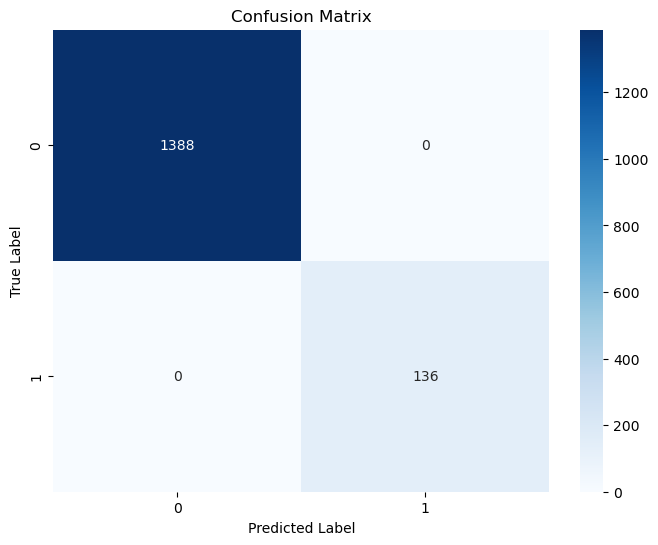

In [47]:
# Apply KNN Imputer to impute missing values
X_train_imputed = imputer.fit_transform(X_train)

# Train the Final Model
FinalModel.fit(X_train_imputed, y_train)

# Predict and evaluate training accuracy
y_pred = FinalModel.predict(X_train_imputed)
print("Training Accuracy =")
print(accuracy_score(y_train, y_pred))

training_conf_matrix = confusion_matrix(y_train, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(training_conf_matrix, annot=True, fmt='d', cmap='Blues', 
xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix")
plt.show()

Testing Accuracy =
1.0


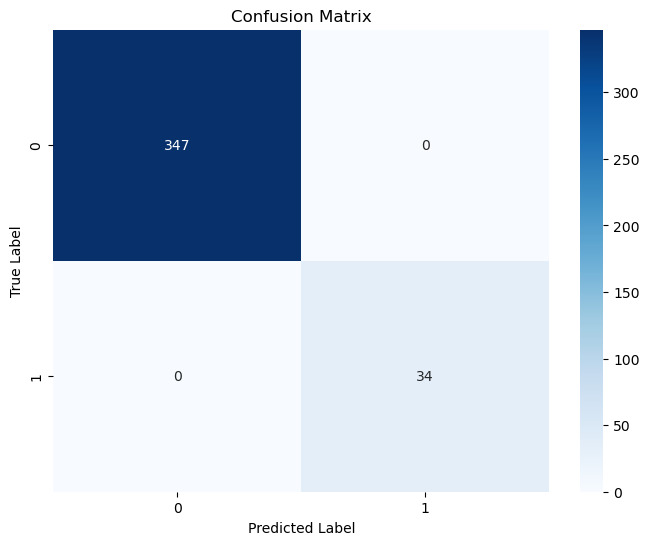

In [48]:
# Predict and evaluate testing accuracy
X_test_imputed = imputer.transform(X_test)


y_pred2 = FinalModel.predict(X_test_imputed)
print("Testing Accuracy =")
print(accuracy_score(y_test, y_pred2))

testing_conf_matrix = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(testing_conf_matrix, annot=True, fmt='d', cmap='Blues', 
xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix")
plt.show()